<a href="https://colab.research.google.com/github/kgoldra/capstone_Xplisit/blob/main/ML/main22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile
import random
import tensorflow as tf
import shutil
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from shutil import copyfile
from os import getcwd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np



In [2]:
path_nails = f"/content/nail diseases.zip"

local_zip = path_nails
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [3]:
ORIGINDIR = "/content/nail diseases"
DATADIR = "/content/Data"
TRAINORTEST = ["training", "testing"]
CATEGORIES = ["aloperia areata", "beau's lines", "bluish nail", "clubbing", "darier's disease", "eczema", "koilonychia", "leukonychia", "lindsay's nails", "muehrck-e's lines", "normal", "onycholycis", "pale nail", "red lunula", "splinter hemmorrage", "terry's nail", "white nail", "yellow nails"]

In [4]:
counter = 0

for trainortest in TRAINORTEST:
  path = os.path.join(DATADIR, trainortest)
  for category in CATEGORIES:
    counter += 1
    originpath = os.path.join(ORIGINDIR, category)
    path2 = os.path.join(path, category)
    if(counter) <= 18:
      print(category, "Datasets Has: ", len(os.listdir(originpath)) ,"Data")
    os.makedirs(path2)
    pass

aloperia areata Datasets Has:  47 Data
beau's lines Datasets Has:  42 Data
bluish nail Datasets Has:  50 Data
clubbing Datasets Has:  40 Data
darier's disease Datasets Has:  47 Data
eczema Datasets Has:  45 Data
koilonychia Datasets Has:  38 Data
leukonychia Datasets Has:  31 Data
lindsay's nails Datasets Has:  38 Data
muehrck-e's lines Datasets Has:  33 Data
normal Datasets Has:  71 Data
onycholycis Datasets Has:  50 Data
pale nail Datasets Has:  35 Data
red lunula Datasets Has:  15 Data
splinter hemmorrage Datasets Has:  62 Data
terry's nail Datasets Has:  36 Data
white nail Datasets Has:  19 Data
yellow nails Datasets Has:  27 Data


In [5]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")
    
    training_sets = int(len(files) * SPLIT_SIZE)
    testing_sets = int(len(files) - training_sets)
    randomed = random.sample(files,len(files))
    training_files = randomed[0:training_sets]
    testing_files = randomed[:testing_sets]
    
    for filename in training_files:
        source = SOURCE + filename
        destination = TRAINING + filename
        copyfile(source, destination)
        
    for filename in testing_files:
        source = SOURCE + filename
        destination = TESTING + filename
        copyfile(source, destination)

In [6]:
normal_DIR = "/content/nail diseases/normal/"
TRAINING_normal_DIR = "/content/Data/training/normal/"
TESTING_normal_DIR = "/content/Data/testing/normal/"

aloperia_DIR = "/content/nail diseases/aloperia areata/"
TRAINING_aloperia_DIR = "/content/Data/training/aloperia areata/"
TESTING_aloperia_DIR = "/content/Data/testing/aloperia areata/"

beau_DIR = "/content/nail diseases/beau's lines/"
TRAINING_beau_DIR = "/content/Data/training/beau's lines/"
TESTING_beau_DIR = "/content/Data/testing/beau's lines/"

bluish_DIR = "/content/nail diseases/bluish nail/"
TRAINING_bluish_DIR = "/content/Data/training/bluish nail/"
TESTING_bluish_DIR = "/content/Data/testing/bluish nail/"

clubbing_DIR = "/content/nail diseases/clubbing/"
TRAINING_clubbing_DIR = "/content/Data/training/clubbing/"
TESTING_clubbing_DIR = "/content/Data/testing/clubbing/"

Darier_DIR = "/content/nail diseases/darier's disease/"
TRAINING_Darier_DIR = "/content/Data/training/darier's disease/"
TESTING_Darier_DIR = "/content/Data/testing/darier's disease/"

eczema_DIR = "/content/nail diseases/eczema/"
TRAINING_eczema_DIR = "/content/Data/training/eczema/"
TESTING_eczema_DIR = "/content/Data/testing/eczema/"

koilonychia_DIR = "/content/nail diseases/koilonychia/"
TRAINING_koilonychia_DIR = "/content/Data/training/koilonychia/"
TESTING_koilonychia_DIR = "/content/Data/testing/koilonychia/"

leukonychia_DIR = "/content/nail diseases/leukonychia/"
TRAINING_leukonychia_DIR = "/content/Data/training/leukonychia/"
TESTING_leukonychia_DIR = "/content/Data/testing/leukonychia/"

lindsay_DIR = "/content/nail diseases/lindsay's nails/"
TRAINING_lindsay_DIR = "/content/Data/training/lindsay's nails/"
TESTING_lindsay_DIR = "/content/Data/testing/lindsay's nails/"

Muehrck_DIR = "/content/nail diseases/muehrck-e's lines/"
TRAINING_Muehrck_DIR = "/content/Data/training/muehrck-e's lines/"
TESTING_Muehrck_DIR = "/content/Data/testing/muehrck-e's lines/"

onycholycis_DIR = "/content/nail diseases/onycholycis/"
TRAINING_onycholycis_DIR = "/content/Data/training/onycholycis/"
TESTING_onycholycis_DIR = "/content/Data/testing/onycholycis/"

pale_nail_DIR = "/content/nail diseases/pale nail/"
TRAINING_pale_nail_DIR = "/content/Data/training/pale nail/"
TESTING_pale_nail_DIR = "/content/Data/testing/pale nail/"

red_lunula_DIR = "/content/nail diseases/red lunula/"
TRAINING_red_lunula_DIR = "/content/Data/training/red lunula/"
TESTING_red_lunula_DIR = "/content/Data/testing/red lunula/"

splinter_hemmorrage_DIR = "/content/nail diseases/splinter hemmorrage/"
TRAINING_splinter_hemmorrage_DIR = "/content/Data/training/splinter hemmorrage/"
TESTING_splinter_hemmorrage_DIR = "/content/Data/testing/splinter hemmorrage/"

terry_DIR = "/content/nail diseases/terry's nail/"
TRAINING_terry_DIR = "/content/Data/training/terry's nail/"
TESTING_terry_DIR = "/content/Data/testing/terry's nail/"

white_DIR = "/content/nail diseases/white nail/"
TRAINING_white_DIR = "/content/Data/training/white nail/"
TESTING_white_DIR = "/content/Data/testing/white nail/"

yellow_DIR = "/content/nail diseases/yellow nails/"
TRAINING_yellow_DIR = "/content/Data/training/yellow nails/"
TESTING_yellow_DIR = "/content/Data/testing/yellow nails/"


split_size = .75




split_data(Darier_DIR, TRAINING_Darier_DIR, TESTING_Darier_DIR, split_size)
split_data(Muehrck_DIR, TRAINING_Muehrck_DIR, TESTING_Muehrck_DIR, split_size)
split_data(aloperia_DIR, TRAINING_aloperia_DIR, TESTING_aloperia_DIR, split_size)
split_data(beau_DIR, TRAINING_beau_DIR, TESTING_beau_DIR, split_size)
split_data(bluish_DIR, TRAINING_bluish_DIR, TESTING_bluish_DIR, split_size)
split_data(clubbing_DIR, TRAINING_clubbing_DIR, TESTING_clubbing_DIR, split_size)
split_data(eczema_DIR, TRAINING_eczema_DIR, TESTING_eczema_DIR, split_size)
split_data(koilonychia_DIR, TRAINING_koilonychia_DIR, TESTING_koilonychia_DIR, split_size)
split_data(leukonychia_DIR, TRAINING_leukonychia_DIR, TESTING_leukonychia_DIR, split_size)
split_data(lindsay_DIR, TRAINING_lindsay_DIR, TESTING_lindsay_DIR, split_size)
split_data(onycholycis_DIR, TRAINING_onycholycis_DIR, TESTING_onycholycis_DIR, split_size)
split_data(pale_nail_DIR, TRAINING_pale_nail_DIR, TESTING_pale_nail_DIR, split_size)
split_data(red_lunula_DIR, TRAINING_red_lunula_DIR, TESTING_red_lunula_DIR, split_size)
split_data(splinter_hemmorrage_DIR, TRAINING_splinter_hemmorrage_DIR, TESTING_splinter_hemmorrage_DIR, split_size)
split_data(terry_DIR, TRAINING_terry_DIR, TESTING_terry_DIR, split_size)
split_data(white_DIR, TRAINING_white_DIR, TESTING_white_DIR, split_size)
split_data(yellow_DIR, TRAINING_yellow_DIR, TESTING_yellow_DIR, split_size)
split_data(normal_DIR, TRAINING_normal_DIR, TESTING_normal_DIR, split_size)

In [7]:
print(len(os.listdir("/content/Data/testing/normal")))
print(len(os.listdir("/content/Data/training/normal")))

18
53


In [8]:
IMGSIZE = 150

In [9]:
training_data = []

def create_training_data():
  path = os.path.join(DATADIR, "training")
  for category in CATEGORIES:
    path2 = os.path.join(path, category)
    class_label = CATEGORIES.index(category)
    for img in os.listdir(path2):
      img_array = cv2.imread(os.path.join(path2,img))
      new_array = cv2.resize(img_array, (IMGSIZE, IMGSIZE))
      training_data.append([new_array, class_label])

create_training_data()

In [10]:
testing_data = []

def create_testing_data():
  path = os.path.join(DATADIR, "testing")
  for category in CATEGORIES:
    path2 = os.path.join(path, category)
    class_label = CATEGORIES.index(category)
    for img in os.listdir(path2):
      img_array = cv2.imread(os.path.join(path2,img))
      new_array = cv2.resize(img_array, (IMGSIZE, IMGSIZE))
      testing_data.append([new_array, class_label])

create_testing_data()

In [11]:
import random

random.shuffle(training_data)
random.shuffle(testing_data)

In [12]:
X = []
x_label = []
y = []
y_label = []

for features, label in training_data:
  X.append(features)
  x_label.append(label)

  
for features, label in testing_data:
  y.append(features)
  y_label.append(label)

X = np.array(X).reshape(-1, IMGSIZE,IMGSIZE, 3).astype('float')
y = np.array(y).reshape(-1, IMGSIZE,IMGSIZE, 3).astype('float')
x_label = np.array(x_label).astype('float')
y_label = np.array(y_label).astype('float')

print(X.shape)
print(y.shape)
print(x_label.shape)
print(y_label.shape)


(538, 150, 150, 3)
(188, 150, 150, 3)
(538,)
(188,)


In [13]:
training_datagen = ImageDataGenerator(
      rescale = 1.0/255.,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


validation_datagen = ImageDataGenerator(
    rescale = 1./255.
)

In [14]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape= (150,150,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(18, activation='softmax')
])

In [15]:
train_generator = training_datagen.flow(
    X,
    x_label,
    batch_size = 32
)

validation_generator = validation_datagen.flow(
    y,
    y_label,
    batch_size = 32
)

In [16]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy')>0.97):
                print("\nReached 97% accuracy so cancelling training!")
                self.model.stop_training = True

In [17]:
callbacks=myCallback()

model.summary()

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])


history = model.fit(
    train_generator,
    steps_per_epoch = 538/32,
    validation_data = validation_generator,
    validation_steps = 188/32,
    epochs = 500, callbacks = [callbacks]
)



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       7

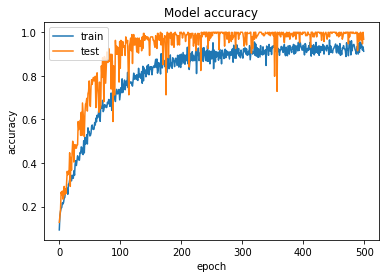

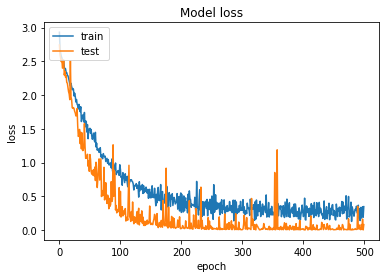

In [18]:
def plot_train_history(history1):
    # Summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
plot_train_history(history)

In [19]:
model.save_weights("model.h5")

In [20]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  xy = image.img_to_array(img)
  xy = np.expand_dims(xy, axis=0)

  images = np.vstack([xy])
  predictions = model.predict(images, batch_size=32)
  print(fn)
  print(predictions)
  print(xy.shape)
 


Saving 4.PNG to 4.PNG
4.PNG
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(1, 150, 150, 3)


In [21]:
class_names = CATEGORIES
test_label = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]

In [79]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  color = 'blue'

  
  plt.xlabel("{} {:2.0f}%".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


In [71]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(18), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


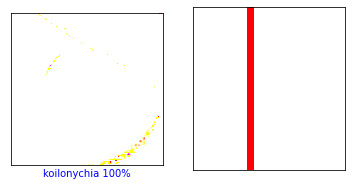

In [80]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_label, xy)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_label)
plt.show()

In [ ]:
import tensorflow as tf

# Load the model.
new_model= tf.keras.models.load_model(filepath="nailss.h5")

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
tflite_model = converter.convert()

# Save the TF Lite model.
with tf.io.gfile.GFile('nailss.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpld9yp_7y/assets


INFO:tensorflow:Assets written to: /tmp/tmpld9yp_7y/assets
